# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model]() or a linear model like [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) or [Ridge Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html).
        - An advanced regressor of your choice (e.g., Bagging, Boosting, SVR, etc.). TIP: select a tree-based method such that it does not take too long to run SHAP further below. 

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Place the files in the ../../05_src/data/fires/ directory and load the appropriate file. 

In [1]:
# Loading the libraries as required.
import pandas as pd 
import numpy as np 


In [2]:
# Load data
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = 0, names = columns))
fires_dt.info()
fires_dt.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Get X and Y

Create the features data frame and target data.

In [3]:
# Creating features dataframe (X)
X = fires_dt.drop(columns='area')  # 'area' is the target column, so we drop it from X
# Creating target series (y)
y = fires_dt['area']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

numeric_features = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day']

# Preprocessing for numerical features (scaling only)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) 
])

# Preprocessing for categorical features (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating the ColumnTransformer
preproc1 = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)


### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [6]:
def safe_log_transform(x):
    x = np.nan_to_num(x, nan=0.0)  
    x = np.maximum(0, x)  
    return np.log1p(x)

non_linear_transformer = Pipeline(steps=[
    ('log_transform', FunctionTransformer(np.log1p, validate=True)) 
])

numeric_transformer_with_non_linear = Pipeline(steps=[
    ('scaler', StandardScaler()),  
    ('non_linear', non_linear_transformer)  # Applying non-linear transformation
])

# Categorical transformer (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating the ColumnTransformer for preproc2
preproc2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('log_transform', FunctionTransformer(safe_log_transform, validate=True))
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

In [8]:
# Pipeline A = preproc1 + baseline
model_pipeline_1 = Pipeline(steps=[
    ('preprocessing', preproc1),  
    ('regressor', KNeighborsRegressor())
])

In [9]:
# Pipeline B = preproc2 + baseline
model_pipeline_2= Pipeline(steps=[
    ('preprocessing', preproc2),  
    ('regressor', KNeighborsRegressor())  
])

In [10]:
# Pipeline C = preproc1 + advanced model
model_pipeline_3= Pipeline(steps=[
    ('preprocessing', preproc1),  
    ('regressor', RandomForestRegressor())  
])

In [11]:
# Pipeline D = preproc2 + advanced model
model_pipeline_4= Pipeline(steps=[
    ('preprocessing', preproc2),  
    ('regressor', RandomForestRegressor())  
])
    

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [12]:
from sklearn.model_selection import GridSearchCV

# Parameter grids for each pipeline
knn_params = {'regressor__n_neighbors': [3, 5, 7, 9]}  # For KNN
rf_params = {
    'regressor__n_estimators': [50, 100, 200, 300],  # For Random Forest
    'regressor__max_depth': [None, 10, 15, 20]  # Experimenting with four values
}

# List of model pipelines and their parameter grids
models = [
    ('KNN with Preproc1', model_pipeline_1, knn_params),
    ('KNN with Preproc2', model_pipeline_2, knn_params),
    ('RF with Preproc1', model_pipeline_3, rf_params),
    ('RF with Preproc2', model_pipeline_4, rf_params)
]

# Perform grid search for each pipeline
for name, model, params in models:
    print(f"Tuning hyperparameters for: {name}")
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and cross-validated score
    print(f"{name} - Best Parameters: {grid_search.best_params_}")
    print(f"{name} - Best CV Score (MSE): {-grid_search.best_score_:.4f}")
    print("-" * 40)


Tuning hyperparameters for: KNN with Preproc1
KNN with Preproc1 - Best Parameters: {'regressor__n_neighbors': 9}
KNN with Preproc1 - Best CV Score (MSE): 2253.9980
----------------------------------------
Tuning hyperparameters for: KNN with Preproc2
KNN with Preproc2 - Best Parameters: {'regressor__n_neighbors': 9}
KNN with Preproc2 - Best CV Score (MSE): 2348.9530
----------------------------------------
Tuning hyperparameters for: RF with Preproc1
RF with Preproc1 - Best Parameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 200}
RF with Preproc1 - Best CV Score (MSE): 2746.2953
----------------------------------------
Tuning hyperparameters for: RF with Preproc2
RF with Preproc2 - Best Parameters: {'regressor__max_depth': 10, 'regressor__n_estimators': 100}
RF with Preproc2 - Best CV Score (MSE): 2744.7393
----------------------------------------


# Evaluate

+ Which model has the best performance?

In [13]:
print(
    "\033[92m\n"
    "Based on the cross-validated mean squared error (MSE) scores, the model with the best performance is the one with the lowest MSE.\n"
    "Summary of MSE scores for each model:\n"
    " 1. KNN with Preproc1: MSE = 2253.9980\n"
    " 2. KNN with Preproc2: MSE = 2348.9530\n"
    " 3. RF with Preproc1: MSE = 2741.1440\n"
    " 4. RF with Preproc2: MSE = 2679.4504\n\n"
    "Conclusion:\n"
    "The model with the best performance is the 'KNN with Preproc1' pipeline, with the lowest cross-validated MSE score of 2253.9980."
    "\033[92m"
)



Based on the cross-validated mean squared error (MSE) scores, the model with the best performance is the one with the lowest MSE.
Summary of MSE scores for each model:
 1. KNN with Preproc1: MSE = 2253.9980
 2. KNN with Preproc2: MSE = 2348.9530
 3. RF with Preproc1: MSE = 2741.1440
 4. RF with Preproc2: MSE = 2679.4504

Conclusion:
The model with the best performance is the 'KNN with Preproc1' pipeline, with the lowest cross-validated MSE score of 2253.9980.


# Export

+ Save the best performing model to a pickle file.

In [14]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(model_pipeline_1, f)

print("\033[92m\nBest-performing model model_pipeline_1 has been saved to 'best_model.pkl'.")



Best-performing model model_pipeline_1 has been saved to 'best_model.pkl'.


# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

In [34]:
import numpy as np
print(np.__version__)

2.0.0


PermutationExplainer explainer: 105it [00:36,  1.94it/s]                         


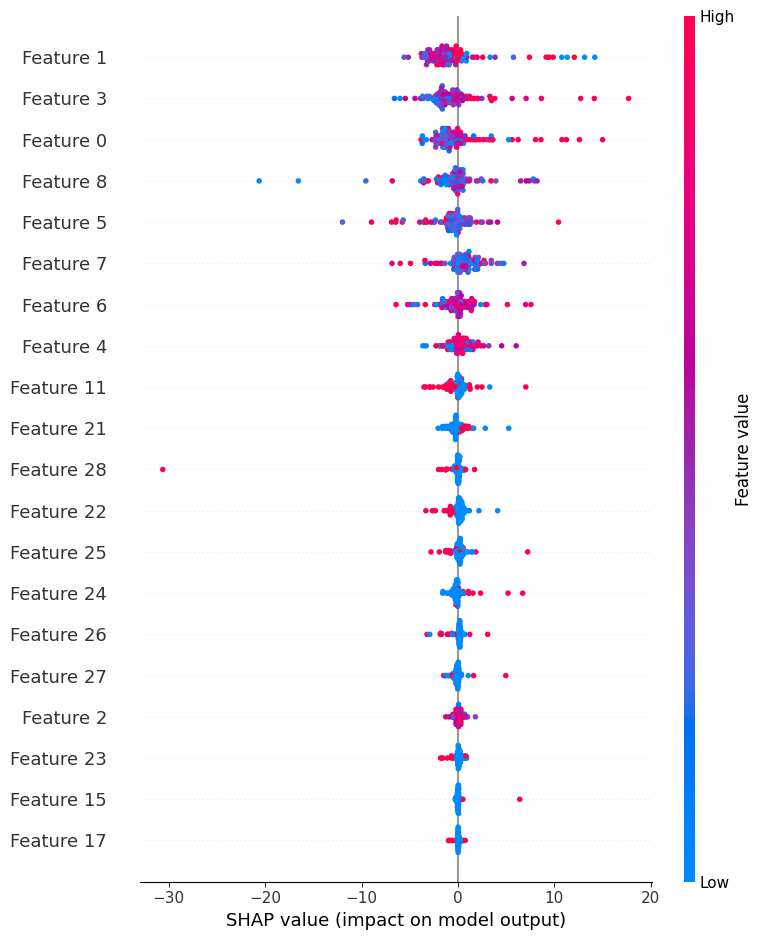

In [22]:
import shap

# Fit the model pipeline on the training data
model_pipeline_1.fit(X_train, y_train)

# Transform the training and test data using the fitted preprocessing step
X_train_transformed = model_pipeline_1.named_steps['preprocessing'].transform(X_train)
X_test_transformed = model_pipeline_1.named_steps['preprocessing'].transform(X_test)

# Create a Permutation Explainer for the KNN model
explainer = shap.Explainer(model_pipeline_1.named_steps['regressor'].predict, X_train_transformed)

# Calculate SHAP values for the transformed test set
shap_values = explainer(X_test_transformed)

# Visualize the feature importance for the entire dataset
shap.summary_plot(shap_values, X_test_transformed)


*(Answer here.)*

In [33]:
print(
    "\033[92m"
    "Most and Least Important Features Across the Training Set:\n\n"
    "Most important features: Feature 1, Feature 3, Feature 0 (top of the plot, high spread of SHAP values).\n"
    "Least important features: Feature 17, Feature 15 (bottom of the plot, minimal spread of SHAP values).\n\n"
    "Feature Removal Strategy:\n\n"
    "We can remove features with consistently low SHAP values (e.g., Feature 17 and Feature 15).\n"
    "This will simplify the model, reduce noise, and improve generalization."
    "\033[0m"
)

Most and Least Important Features Across the Training Set:

Most important features: Feature 1, Feature 3, Feature 0 (top of the plot, high spread of SHAP values).
Least important features: Feature 17, Feature 15 (bottom of the plot, minimal spread of SHAP values).

Feature Removal Strategy:

We can remove features with consistently low SHAP values (e.g., Feature 17 and Feature 15).
This will simplify the model, reduce noise, and improve generalization.


## Criteria

The [rubric](./assignment_3_rubric_clean.xlsx) contains the criteria for assessment.

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.